### Q1.1 Create your myknn_regressor based on the skeleton.

In [81]:
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [82]:
'''my knn model'''
class myknn_regressor():
    def __init__(self, n_neighbors, mean_type):
        self.n_neighbors = n_neighbors
        self.type = mean_type

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def euclidean_dist(self, x, y):  # Calculate the euclidean distance between training and testing data
        return np.sqrt(np.sum((x - y) ** 2))

    def predict(self, x_test):
        y_predicts = []  # 裝所有 test points 的 Y predictions

        # 把所有 test data points 與所有 train data points 的距離都算出來，並 return y_pred
        for x in x_test:
            y_predicts.append(self.before_predict(x))

        return np.array(y_predicts)

    def before_predict(self, x):
        # 計算單個 test data point(x) 與所有 training data points 的距離
        distances = []
        for x_train in self.X_train:
            distances.append(self.euclidean_dist(x, x_train))

        # 取得與單個 test data point(x) 最近的 k 個 neighbors 的 indices
        k_indices = np.argsort(distances)[:self.n_neighbors]

        # 取得最近的 k 個 neighbors 的 labels(from y_train) 用來作 prediction
        y_labels = []

        for idx in k_indices:
            y_labels.append(self.Y_train[idx])  # 要用來預測的所有 labels

        # equal weight
        if (self.type == 'equal_weight') or int(self.n_neighbors) < 10:
            y_predict = np.mean(y_labels)
        # remove outliers
        elif self.type == 'remove_outliers':
            Q1 = np.quantile(y_labels, 0.25)
            Q3 = np.quantile(y_labels, 0.75)
            IQR = Q3 - Q1
            outliers_lst = []
            for k in range(self.n_neighbors):
                if y_labels[k] < Q1 - 1.5*IQR or y_labels[k] > Q3 + 1.5*IQR:
                    outliers_lst.append(y_labels[k])
            for k in range(len(outliers_lst)):
                y_labels.remove(outliers_lst[k])
            y_predict = np.mean(y_labels)

        return y_predict

### Q1.2 Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model. 

### Make predictions using  𝑘=20 and "equal_weight" 𝑓. List the RMSE and the first 20 predictions in the test data.

In [83]:
# calculate RMSE
def rmse(predictions, targets):
    return np.sqrt((np.square(np.subtract(predictions, targets))).mean())

myknn = myknn_regressor(20, 'equal_weight')
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
rmse = rmse(ypred, Y_test)
first20 = ypred[:20]

print('RMSE:', rmse)
print('First 20 predictions:', first20)

RMSE: 10.25126451549596
First 20 predictions: [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


### Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.

### Make predictions using  𝑘=20 and "remove_outier" 𝑓. List the RMSE and the first 20 predictions in the testing data.

In [84]:
# calculate RMSE
def rmse(predictions, targets):
    return np.sqrt((np.square(np.subtract(predictions, targets))).mean())

myknn = myknn_regressor(20, 'remove_outliers')
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
rmse = rmse(ypred, Y_test)
first20 = ypred[:20]

print('RMSE:', rmse)
print('First 20 predictions:', first20)

RMSE: 10.212572466080376
First 20 predictions: [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


### Q2.1 All feature values are standardized to have unit variances and zero means

In [85]:
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

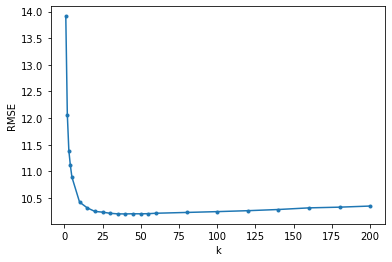

In [86]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

def rmse(predictions, targets):
    return np.sqrt((np.square(np.subtract(predictions, targets))).mean())

k_list1 = []
rmse_list1 = []

for i in range(len(k)):
    neighs = KNeighborsRegressor(k[i])
    neighs.fit(X_train, Y_train)
    y_preds = neighs.predict(X_test)

    k_list1.append(k[i])
    rmse_list1.append(rmse(y_preds, Y_test))
    
plt.xlabel('k')
plt.ylabel('RMSE')
plt.plot(k_list1, rmse_list1, marker='o', markersize=3)

### Q2.2 No feature scaling

In [87]:
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

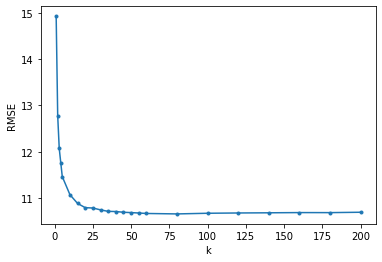

In [88]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

def rmse(predictions, targets):
    return np.sqrt((np.square(np.subtract(predictions, targets))).mean())

k_list2 = []
rmse_list2 = []

for i in range(len(k)):
    neighs = KNeighborsRegressor(k[i])
    neighs.fit(X_train, Y_train)
    y_preds = neighs.predict(X_test)

    k_list2.append(k[i])
    rmse_list2.append(rmse(y_preds, Y_test))
    
plt.xlabel('k')
plt.ylabel('RMSE')
plt.plot(k_list2, rmse_list2, marker='o', markersize=3)

### Q2.3 uses standardized features and adopted myknn_regressor with "remove_outlier"  𝑓 to make predictions.

In [89]:
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

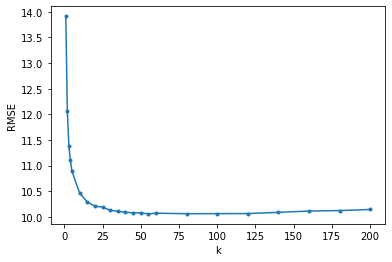

In [74]:
def rmse(predictions, targets):
    return np.sqrt((np.square(np.subtract(predictions, targets))).mean())

k = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

k_list3 = []
rmse_list3 = []

for i in range(len(k)):
    neighs = myknn_regressor(k[i], 'remove_outliers')
    neighs.fit(X_train, Y_train)
    y_preds = neighs.predict(X_test)

    k_list3.append(k[i])
    rmse_list3.append(rmse(y_preds, Y_test))

plt.xlabel('k')
plt.ylabel('RMSE')
plt.plot(k_list3, rmse_list3, marker='o', markersize=3)

### Plot the three curves together

Text(0, 0.5, 'RMSE')

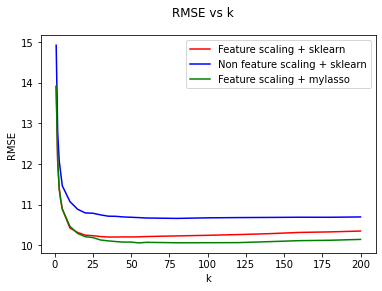

In [80]:
plt.plot(k_list1, rmse_list1, color = 'r')
plt.plot(k_list2, rmse_list2, color = 'b')
plt.plot(k_list3, rmse_list3, color = 'g')
plt.legend(['Feature scaling + sklearn', 'Non feature scaling + sklearn', 'Feature scaling + mylasso'])
plt.suptitle('RMSE vs k')
plt.xlabel('k')
plt.ylabel('RMSE')

### Plot the three curves together

### Q3.1 基於本題給的 𝐿，推導新的Coordinate Descent with Soft Thresholding公式 

$$
L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda \sum_{i=1}^M |w_i|
$$
$$
\frac{\partial L}{\partial w_j} =  \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)(-x_{i,j}) +  \lambda sgn(w_j)
$$
$$
\frac{\partial L}{\partial w_j} =  \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}_{-j}^T \mathbf{x}_{i,-j} - w_j x_{i,j} -  w_0)(-x_{i,j}) +  \lambda sgn(w_j)
$$
$$
\frac{\partial L}{\partial w_j} =  \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}_{-j}^T \mathbf{x}_{i,-j} -  w_0)(-x_{i,j}) +   \frac{1}{n} w_j \sum_{i=1}^n (x_{i,j})^2 + \lambda sgn(w_j) = 0
$$
$$
w_j =  \frac{ \sum_{i=1}^n (y_i - \mathbf{w}_{-j}^T \mathbf{x}_{i,-j} -  w_0)(x_{i,j}) - n \lambda sgn(w_j)}{\sum_{i=1}^n (x_{i,j})^2}
$$
$$
w_j =   \frac{ \sum_{i=1}^n (y_i - \mathbf{w}_{-j}^T \mathbf{x}_{i,-j} -  w_0)(x_{i,j}) - n \lambda}{\sum_{i=1}^n (x_{i,j})^2}, IF \frac{\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_{i,-j} -  w_0)(x_{i,j}) - n \lambda}{\sum_{i=1}^n (x_{i,j})^2} > 0
$$
$$
w_j =   \frac{ \sum_{i=1}^n (y_i - \mathbf{w}_{-j}^T \mathbf{x}_{i,-j} -  w_0)(x_{i,j}) + n \lambda}{\sum_{i=1}^n (x_{i,j})^2}, IF \frac{\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_{i,-j} -  w_0)(x_{i,j}) + n \lambda}{\sum_{i=1}^n (x_{i,j})^2} < 0
$$
$$
0,otherwise
$$

### Q3.2 使用給定個骨架建構你的mylasso。

In [90]:
#load the dataset, and create normalized and raw features.
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)


#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])

#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])  # 5000 * 90
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']  # 5000 * 1
Y_test = msd_data['Y_test']

In [91]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        self.lamb = lamcoef  # lambda
        self.max_iter = max_iter
        self.tolerance = tol
        self.const_reg = const_regu

    def fit(self, x_train, y_train, winit, keep_traindata, verbose = False):

        if keep_traindata == True:
            self.X_train = x_train
            self.Y_train = y_train
        self.verbose = verbose

        x_train = np.column_stack((np.ones(len(x_train)),x_train))  # 加上 X0
        m = x_train.shape[0]  # 5000
        n = x_train.shape[1]  # 91

        if winit == 'ridge':  # 用 ridge regression 設定初始值
            w = np.linalg.inv(np.dot(x_train.T,x_train) + np.eye(n)*self.lamb).dot(x_train.T).dot(y_train)

        '''coordinate descent'''
        l_list = []
        for i in range(self.max_iter):
            for j in range(n):
                last_wt = np.copy(w)  # 91 * 1
                if j != 0:
                    last_wt[j] = 0  # 把 Wj 變成 0

                z = np.sum(x_train * x_train, axis=0)  # sum(Xi)**2
                residuals = y_train - np.dot(x_train, last_wt)  # 5000*91 , 91*1
                j_star = np.sum(x_train[:, j] * residuals)  # 這個 j_star 跟老師的不太一樣

                if not self.const_reg and j == 0:  # W0
                    w[j] = j_star / z[j]
                else:
                    if j_star < -(self.lamb * m):
                        w[j] = (j_star + self.lamb * m) / z[j]
                    elif j_star > self.lamb * m:
                        w[j] = (j_star - (self.lamb * m)) / z[j]
                    else:
                        w[j] = 0

            L = np.mean((y_train - np.dot(x_train, w)) ** 2) / 2 + self.lamb * np.nansum(np.abs(w))  
            if not self.const_reg:
                L -= self.lamb * np.abs(w[0])  
            l_list.append(L)

            if i != 0 and abs(l_list[i] - l_list[i - 1]) < self.tolerance:
                break

            self.L_list = l_list
            self.w = w

    def predict(self, x_test):
        x_test = np.column_stack((np.ones(len(x_test)),x_test))
        y = np.dot(x_test, self.w)
        return y

    def result(self):
        results = []
        print('Training loss:', self.L_list[-1])
        results.append(self.L_list[-1])
        y_predicts = self.predict(self.X_train)
        rmse = np.sqrt((np.square(np.subtract(y_predicts, self.Y_train))).mean())
        print('RMSE:', rmse)
        results.append(rmse)
        mae = np.mean(np.abs(y_predicts-self.Y_train))
        print('MAE:', mae)
        results.append(mae)
        print('Intercept:', self.w[0])
        results.append(self.w[0])
        wt = np.array(self.w[1:])
        print('Feature weights:', wt)
        results.append(self.w[1:])
        print('非零權重的個數: ', len(wt[wt != 0]))
        results.append(len(wt[wt!=0]))
        print('Average Weight Size: ', np.mean(wt))
        results.append(np.mean(wt))
        return results

### Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。

In [92]:
np.set_printoptions(suppress=True)
lasso = mylasso()
lasso.fit(X_train_sd, Y_train, "ridge", True, False)
lasso.result()

Training loss: 49.88919849390567
RMSE: 9.719682740135507
MAE: 6.9900640977077755
Intercept: 1998.22603547929
Feature weights: [ 4.65149469 -2.45726579 -1.06326999  0.         -0.34231573 -2.94695043
  0.         -0.39967846 -0.42647184  0.         -0.23508782 -0.39505721
  0.50377845  0.         -0.33977548  0.61321153  0.15721976  0.43025983
  0.43548803  1.12847847  0.40665286  0.          1.78001172  0.
 -0.16839325  0.07844224  0.66198864  0.01250811  0.15398749  0.
 -0.21773677 -0.22184915  0.         -0.0026038  -0.01729687 -0.26084155
  0.          0.28998407  0.34870842  0.         -0.26111139 -0.14456046
 -0.01017548  0.03508809 -0.03985507  0.          0.00309025 -0.17737277
  0.          0.06481336  0.27116205  0.          0.          0.
  0.          0.         -0.6373202   0.23816168 -0.18988466  0.
 -0.18883914  0.         -0.13593493  0.06122665 -0.2662238   0.
  0.          0.         -0.03118913  0.         -0.19311313  0.01225373
  0.20725809  0.25121473  0.12277347  

[49.88919849390567,
 9.719682740135507,
 6.9900640977077755,
 1998.22603547929,
 array([ 4.65149469, -2.45726579, -1.06326999,  0.        , -0.34231573,
        -2.94695043,  0.        , -0.39967846, -0.42647184,  0.        ,
        -0.23508782, -0.39505721,  0.50377845,  0.        , -0.33977548,
         0.61321153,  0.15721976,  0.43025983,  0.43548803,  1.12847847,
         0.40665286,  0.        ,  1.78001172,  0.        , -0.16839325,
         0.07844224,  0.66198864,  0.01250811,  0.15398749,  0.        ,
        -0.21773677, -0.22184915,  0.        , -0.0026038 , -0.01729687,
        -0.26084155,  0.        ,  0.28998407,  0.34870842,  0.        ,
        -0.26111139, -0.14456046, -0.01017548,  0.03508809, -0.03985507,
         0.        ,  0.00309025, -0.17737277,  0.        ,  0.06481336,
         0.27116205,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.6373202 ,  0.23816168, -0.18988466,  0.        ,
        -0.18883914,  0.        , -0.1359349

### Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。

In [93]:
y_predicts = lasso.predict(X_test_sd)
print('前五筆資料的預測年分: ', y_predicts[0:5])
rmse = np.sqrt((np.square(np.subtract(y_predicts, Y_test))).mean())
print('Test RMSE: ', rmse)
mae = np.mean(np.abs(y_predicts - Y_test))
print('Test MAE: ', mae)

前五筆資料的預測年分:  [1991.89315875 1999.03324181 2001.71521773 1991.26431643 1994.3846224 ]
Test RMSE:  9.64898266728784
Test MAE:  6.930246529197927


### Q3.5 使用下面的 𝜆 訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個 𝜆 的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

In [94]:
lambda_lst = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
training_loss = []
nonzero_num = []
averge_weight_size = []
training_rmse = []
test_rmse = []
for i in lambda_lst:
    print('--------------- lambda = ', i, ' -------------------')
    lasso = mylasso(i, 1000, 1e-6)
    lasso.fit(X_train_sd, Y_train, "ridge",True, False)
    result = lasso.result()
    training_loss.append(result[0])
    training_rmse.append(result[1])
    nonzero_num.append(result[5])
    averge_weight_size.append(result[6])
    y_predicts = lasso.predict(X_test_sd)
    rmse = np.sqrt((np.square(np.subtract(y_predicts, Y_test))).mean())
    test_rmse.append(rmse)

--------------- lambda =  0.0001  -------------------
Training loss: 46.570460237674276
RMSE: 9.65051565680034
MAE: 6.94495588192388
Intercept: 1998.2659600346797
Feature weights: [ 5.07680419 -2.87234531 -1.45816822  0.4818689  -0.69920969 -3.61170798
 -0.04800842 -0.88087652 -0.55206385 -0.1626548  -0.46604443 -0.35479191
  0.76201719  0.01403546 -0.95852271  0.74452173  0.20140093  0.95630278
  0.70381118  0.65420269  0.59232453  0.43040255  1.74974514  0.2406231
 -0.37725331  0.19948797  1.15056173  0.14670344  0.30253428  0.00530252
 -0.33496457 -0.42660058 -0.20576565 -0.18090943 -0.2850448  -0.29856502
 -0.06317797  0.27725083  0.56546128 -0.15462781 -0.21434242 -0.28782084
 -0.09124669  0.17457523 -0.31119615  0.19011309  0.07631298 -0.42274675
 -0.09278769  0.22743159  0.42170494  0.16562672  0.16013275  0.24609145
 -0.02587266  0.12363128 -0.71815324  0.56008599 -0.27524089  0.09281163
 -0.2652196   0.19809963 -0.31023304  0.24273109 -0.5657452  -0.05383544
  0.20590748 -0.17

Training loss: 56.39564803547887
RMSE: 10.098972615673835
MAE: 7.413622685699808
Intercept: 1998.0661933806628
Feature weights: [ 2.98156206 -1.28134625 -0.63018402  0.          0.         -2.07702597
  0.          0.          0.          0.          0.         -0.22591713
  0.          0.12417852  0.          0.20676853  0.24905624  0.
  0.          1.21977649  0.          0.          0.83663171  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.02367224  0.          0.         -0.10758502  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.36793676  0.         -0.10887959  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.07083472  0.          0.          0.         -0.29069294
  0

### 折線圖與觀察：隨著 lambda 的增加，training loss、training rmse、test rmse 持續增加，number of nonzero weights 則逐漸減少，而 average weight size 有起有落。

Training Loss:  [46.570460237674276, 46.58737437021037, 46.60845532891931, 46.77465366236993, 46.97682719863592, 48.417585780569055, 49.88919849390567, 56.39564803547887, 59.96915307496806, 61.81132123460338]

Number of Nonzero Weights:  [90, 90, 90, 88, 87, 76, 59, 16, 4, 1]

Average Weight Size (Mean of Absolute Weight): [0.002287228870819746, 0.002471128961597367, 0.0027010040750673, 0.0046618372893675285, 0.0057339364890353255, 0.012592779463539797, 0.014988827469725482, 0.006921253552252724, 0.01014059728318994, 0.004265587910527189]

Training RMSE:  [9.65051565680034, 9.650519070991674, 9.65052974033181, 9.65086679873059, 9.651758831060382, 9.67262653137704, 9.719682740135507, 10.098972615673835, 10.599378154630587, 11.049300014997197]

Test RMSE:  [9.644299786080719, 9.643940654706666, 9.643498863193056, 9.64025810308054, 9.63657293202623, 9.626705348753143, 9.64898266728784, 10.004916341387593, 10.49260663601527, 10.954786472216894]

Training Loss vs lambda


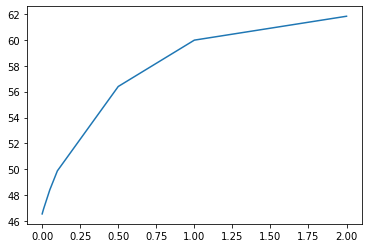

Number of Nonzero Weights vs lambda


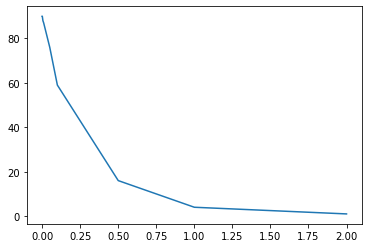

Average Weight Size (Mean of Absolute Weight) vs lambda


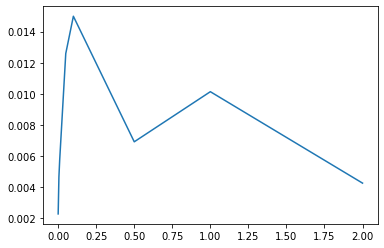

Training RMSE vs lambda


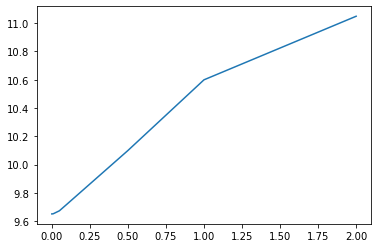

Test RMSE vs lambda


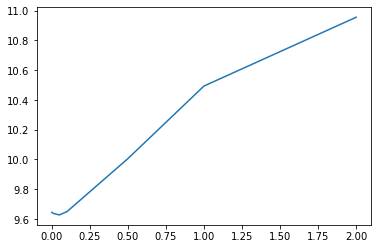

In [95]:
print('Training Loss: ', training_loss)
print('\nNumber of Nonzero Weights: ', nonzero_num)
print('\nAverage Weight Size (Mean of Absolute Weight):', averge_weight_size)
print('\nTraining RMSE: ', training_rmse)
print('\nTest RMSE: ', test_rmse)
print('\nTraining Loss vs lambda')
plt.plot(lambda_lst, training_loss)
plt.show()
print('Number of Nonzero Weights vs lambda')
plt.plot(lambda_lst, nonzero_num)
plt.show()
print('Average Weight Size (Mean of Absolute Weight) vs lambda')
plt.plot(lambda_lst, averge_weight_size)
plt.show()
print('Training RMSE vs lambda')
plt.plot(lambda_lst, training_rmse)
plt.show()
print('Test RMSE vs lambda')
plt.plot(lambda_lst, test_rmse)
plt.show()